# The WHO and WHY of Telco Churn 
### Exploring, Evaluating and Creating classification models to predict customer churn
by Jennifer Eyring
Jemison Cohort

## <u> Executive Summary: </u>
#### - Key demographic groups that churn: Senior citizens and Single Telco customers
#### - Main churn features that relate to these demographics:
        - Fiber Optic Internet Service
        - Non-automated Payment forms 

## <u> Data Dictionary</u>

- The Telco dataset was collect from CodeUp's MySQL database. <a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">You can read more about the Telco data set here.</a>


|Target|Datatype|Definition|
|:-------|:--------|:----------|
| churn | 7043 non-null: object | Telco's recent customer churn list |

|Feature|Datatype|Definition|
|:-------|:--------|:----------|
| gender           |  7043 non-null: object | gender of Telco customers|
| senior_citizen   |  7043 non-null: int64  | 60+ aged Telco customers|
| partner          |  7043 non-null: object | Telco customers with/without partner|
| dependents       |  7043 non-null: object | Customers with/without dependents|
| contract_type    |  7043 non-null: object | Contract types for customers|
| internet_service_type |  7043 non-null: object | None; DSL; Fiber Optic types|
| payment_types    |  7043 non-null: object | payment forms for Customers|


## <u> Project Question: </u>
### <i> Is there a specific demographic group that is associated with more churn than expected?

In [1]:
import warnings
warnings.filterwarnings("ignore")

#adding those necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pydataset as data

#sklearn tools:: working those models!
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#calling those py files
from acquire import get_telco_data
from prepare import clean_telco_data, prep_telco_data

from env import get_db_url

α = .05

#calling the dataframe
telco_df = get_telco_data()
#prepped and split
train, validate, test = prep_telco_data(telco_df)

#visualization file
import viz

## Goal: Find the main demographic drivers and their subgroups for Telco churn.
*I decided to look into demographics first, as this wasn't subgroups I was able to explore last presentation project.

## QUESTION 1: Are more churned customers single and/or without dependents?

### Hypothesis 1:
- <i>H0: There is NO relationship between churn and customers without partners
- <i>Ha: There IS a relationship between churn and customers without partners

In [2]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to partnerships of customers
# Alternative hypothesis: there is a relationship between churn rate and partnerships of customers
alpha = 0.05
observed = pd.crosstab(train.churn, train.partner)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that partnership and churn are independent")

The p-value is 2.0115703972096128e-23
Sufficient evidence is present to reject the null hypothesis


#### USING VISUALS...

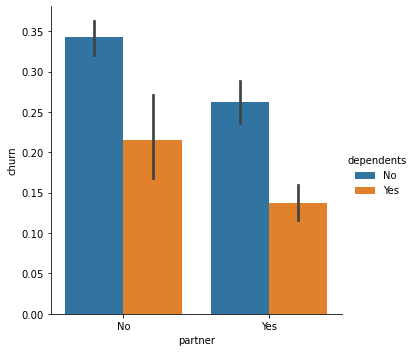

In [3]:
#Relationship between churn, customers having partners and dependents
sns.catplot(x="partner", y ="churn",  hue="dependents",data=train, kind="bar")

## OUTCOME: 
### - I rejected the Null Hypothesis, in that there is a relationship with single customers and churn.

## QUESTION 2: Are more Senior Citizens churning than other age groups?

Hypothesis 2:

* <i>H0: There is NO relationship between churn and Senior customers.
* <i>Ha: There IS a relationship between churn and Senior customers.

In [4]:
# Chi squared with un-encoded categorical columns
# Null hypothesis: churn rate has no relation to senior citizen customers
# Alternative hypothesis: there is a relationship between churn rate and senior citizens
alpha = 0.05
observed = pd.crosstab(train.churn, train.senior_citizen)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that senior_citizens and churn are independent")

The p-value is 1.1002429756735793e-26
Sufficient evidence is present to reject the null hypothesis


#### USING VISUALS...

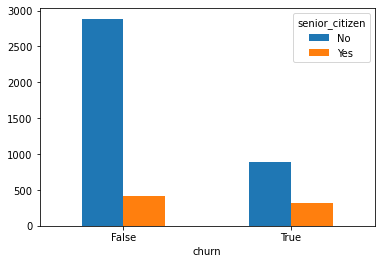

In [5]:
#let's look at the numbers visually
barplot = observed.plot.bar(rot=0)

## OUTCOME: I rejected the Null Hypothesis, in that there is a relationship with senior customers and churn.
- From first glance, because of the low amount of Senior Citizen data count, it looks like customers 59 and younger have more churns. By numbers, YES, 59 and younger DO have more churn, but <mark>by churn rate compared to each customer age category, Senior Citizens have the highest churn rate.</mark>

### <mark><b>  Senior Citizens: 41% churned
59 and younger customers: 24% churned</b></mark>


## Why the Churn??

## INTERNET TYPE ACCOUNTS- Are you getting enough FIBER??

### Seeing if internet type relates to the churn rate.

* H0: There is NO relationship between internet type of accounts and customers churning.
* Ha: There IS a relationship between internet type of and customers churning.

In [6]:
# Chi squared with un-encoded categorical columns
alpha = 0.05
observed = pd.crosstab(train.internet_service_type, train.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
if p < alpha:
    print("Sufficient evidence is present to reject the null hypothesis")
else:
    print("Insufficient evidence to reject the null")
    print("Evidence seems to support the claim that senior customers and internet account types are independent")

The p-value is 2.4617612720873587e-96
Sufficient evidence is present to reject the null hypothesis


### <i> Seniors that churned and their internet services:

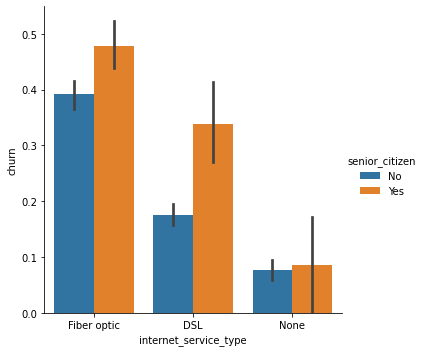

In [7]:
#Relationship between Senior customers and their internet service type against their churn rate
sns.catplot(x="internet_service_type", y ="churn",  hue="senior_citizen",data=train, kind="bar")

### <i> Singles that churned and their internet services:

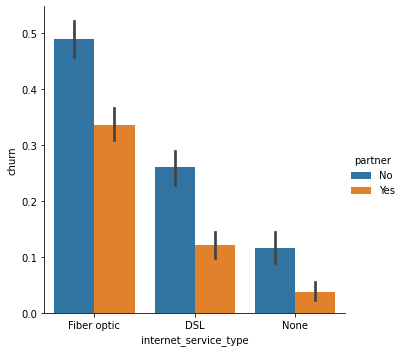

In [8]:
#Relationship between Single Telco customers and their internet service type against their churn rate
sns.catplot(x="internet_service_type", y ="churn",  hue="partner",data=train, kind="bar")

# MODELING: Strike a pose...and get learning
The models I went through in my training exploration were:
  * <u><b>Logistical Regression: </u></b>I chose this first to weigh all of the numeric data against target
  * <u>Decision Tree:</u>
  * <u>Random Forest:</u>
  * <u>KNN:</u>

## MVP Models - Takeaways

<i><b>What Models I Used and outcomes:</b>
- 1) DecisionTree classifier: 83%train | 79%validate | 4%diff
- 2) RandomForest classifier: 84%train | 80%validate | 3%diff
- 3) Logistical Regression:   80%train | 74% with key features
- 4) KNNeighbors classifier:  81%train | 79%validate | 2%diff
<br>
<br>
- My DecisionTree models show some great training accuracies (83%) but the differences between validation and training concern me and I decided not to choose any of those for my MVP due to concerns of overfitting the data.


- My Random Forest models were a close second choice as training accuracy with a max depth of 9 was 84% | validate was 81%...but I still felt like the differences (and drops shown in the validation chart) weren't as predictable in finding a constant rate to test the model on.


- <mark><b>I decided on using my KNN model</b> with an 10 count of neighbors to help predict new data as relative to churn or not. <b>My KNN model had a 81% accuracy rate (5% higher than baseline)</b> and I feel like because KNN models and take in real-time occurances and be adjusted over time, this model will do well not only now predicting churn, but can also be a model we move forward with as we make necessary adjustments due to churn and what the next churn predictors might be.</mark>

#### THINGS TO KEEP IN MIND WITH KNN MODELS:
* With high dimensions and lots of features against churn, distance of predictions could breakdown. The model would need to be readjusted to input variables that are needed to predict the churn predictions.

*******NOTE:When creating my models, I had to drop categorical columns (as shown below), as well as set my x and y for train, validate and test
For a more in-depth look at what I did for each train/fit of the models, check out:

<a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Telco Churn Scratch Pad here.</a>

In [ ]:
# Dropping categorical and not-needed columns that are leftover.

X_train = train.drop(columns=['churn','customer_id','gender', 'dependents','partner', 
                              'senior_citizen', 'phone_service','multiple_lines','online_security','online_backup',
                              'payment_type','total_charges','device_protection','tech_support','streaming_tv','streaming_movies',
                             'paperless_billing','contract_type','internet_service_type','total_charges'])
y_train = train[['churn']]

X_validate = validate.drop(columns=['customer_id','churn','gender', 'dependents','partner', 
                              'senior_citizen', 'phone_service','multiple_lines','online_security','online_backup',
                              'payment_type','total_charges','device_protection','tech_support','streaming_tv','streaming_movies',
                             'paperless_billing','contract_type','online_security','online_backup',
                              'payment_type','total_charges','device_protection','internet_service_type','total_charges'])
y_validate = validate[['churn']]

X_test = test.drop(columns=['customer_id','churn','gender', 'dependents','partner', 
                              'senior_citizen', 'phone_service','multiple_lines','online_security','online_backup',
                              'payment_type','total_charges','device_protection','tech_support','streaming_tv','streaming_movies',
                             'paperless_billing','contract_type','internet_service_type','total_charges'])
y_test = test[['churn']]

<b>BASELINE: 73%</b>

In [9]:
#Defining the baseline prediction:
train.churn.mode()
#Mode meaning when a customer did not churn, so our baseline guess would be that a customer will not churn. 


#Calculating the percentage of customers that churned:
train[train['churn'] == False].shape[0] / train.shape[0]

0.7342222222222222

In [10]:
#### KNN MODEL CREATION SYNTAX:

#Setting neighbors to 5
#fitting the model to data
#making predictions and estimation of probabilities
#______________________________________________________
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#fit the model
knn.fit(X_train, y_train)
#making predictions
y_pred = knn.predict(X_train)
#estimating probabilities
y_pred_proba = knn.predict_proba(X_train)

NameError: name 'X_train' is not defined

In [ ]:
#### EVALUATING THE MODEL W/ 10 NEIGHBORS:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

In [ ]:
#Classification report:
print(classification_report(y_train, y_pred))

In [ ]:
#Taking a look at what the relationship of train, validate and difference of the KNN (with 10 neighbors)model is:
viz.visualize(X_train, y_train, X_validate, y_validate)